In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

Celda 2 (lectura de datos):

In [2]:
churn = pd.read_csv('D:/voiceflip/datasets/churn_uplift_anonymized.csv')

información del dataset

In [3]:
# Estadísticas descriptivas básicas
# Información sobre tipos de datos y memoria
print("\n=== Información del Dataset ===")
print(churn.info())


=== Información del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Columns: 180 entries, PC1 to t
dtypes: float64(160), int64(2), object(18)
memory usage: 16.3+ MB
None


In [4]:
churn.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,FACTOR11,FACTOR12,FACTOR13,FACTOR14,FACTOR15,FACTOR16,FACTOR17,FACTOR18,y,t
0,-3.064007,-1.272259,-4.075844,1.492514,2.328039,-0.330240,-0.770389,0.035541,2.439325,-0.847266,...,V2,V2,V5,V20,V9,V11,V1,V4,0,0
1,-4.574066,-3.541815,1.107371,0.447314,-0.471140,-0.567309,0.195963,0.383654,1.523472,-0.184596,...,V2,V3,V6,V20,V9,V15,V4,V4,0,0
2,-1.751471,-2.039692,-3.788823,0.624226,0.564614,-0.713385,1.003502,1.582819,-1.461687,0.844975,...,V5,V2,V11,V20,V9,V1,V4,V4,0,1
3,-2.030089,-0.235720,-5.711960,1.071841,2.441541,0.758484,-0.534295,1.614289,-1.022909,-1.383025,...,V2,V2,V4,V20,V11,V1,V4,V4,0,1
4,-2.377857,-2.478670,-1.051946,2.812768,2.019267,0.095542,-0.033324,-1.332319,4.316526,-0.537967,...,V2,V2,V7,V20,V2,V1,V2,V2,0,1


In [5]:
churn.shape

(11896, 180)

In [6]:
print(f'- La cantidad de valores faltantes es: {churn.isna().sum().sum()}\n -La cantidad de registros duplicados es: {churn.duplicated().sum()}')

- La cantidad de valores faltantes es: 0
 -La cantidad de registros duplicados es: 0


In [7]:
binary_cols = [col for col in churn.columns if churn[col].nunique() == 2]
print("Columnas binarias:", binary_cols)

Columnas binarias: ['FACTOR8', 'y', 't']


In [ ]:
churn['FACTOR8'].value_counts()

In [8]:
# Calculate counts and percentages
counts = churn['y'].value_counts()
percentages = churn['y'].value_counts(normalize=True).mul(100).round(2)

# Combine counts and percentages
result = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages.astype(str) + '%'
})

result

,Count,Percentage
y,,
0,11488,96.57%
1,408,3.43%


In [9]:
# Calculate counts and percentages
counts = churn['t'].value_counts()
percentages = churn['t'].value_counts(normalize=True).mul(100).round(2)

# Combine counts and percentages
result = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages.astype(str) + '%'
})

result

,Count,Percentage
t,,
1,9010,75.74%
0,2886,24.26%


C:\Users\Acer\AppData\Local\Temp\ipykernel_21064\619696511.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.index, y=top_corr.values, palette=colors)


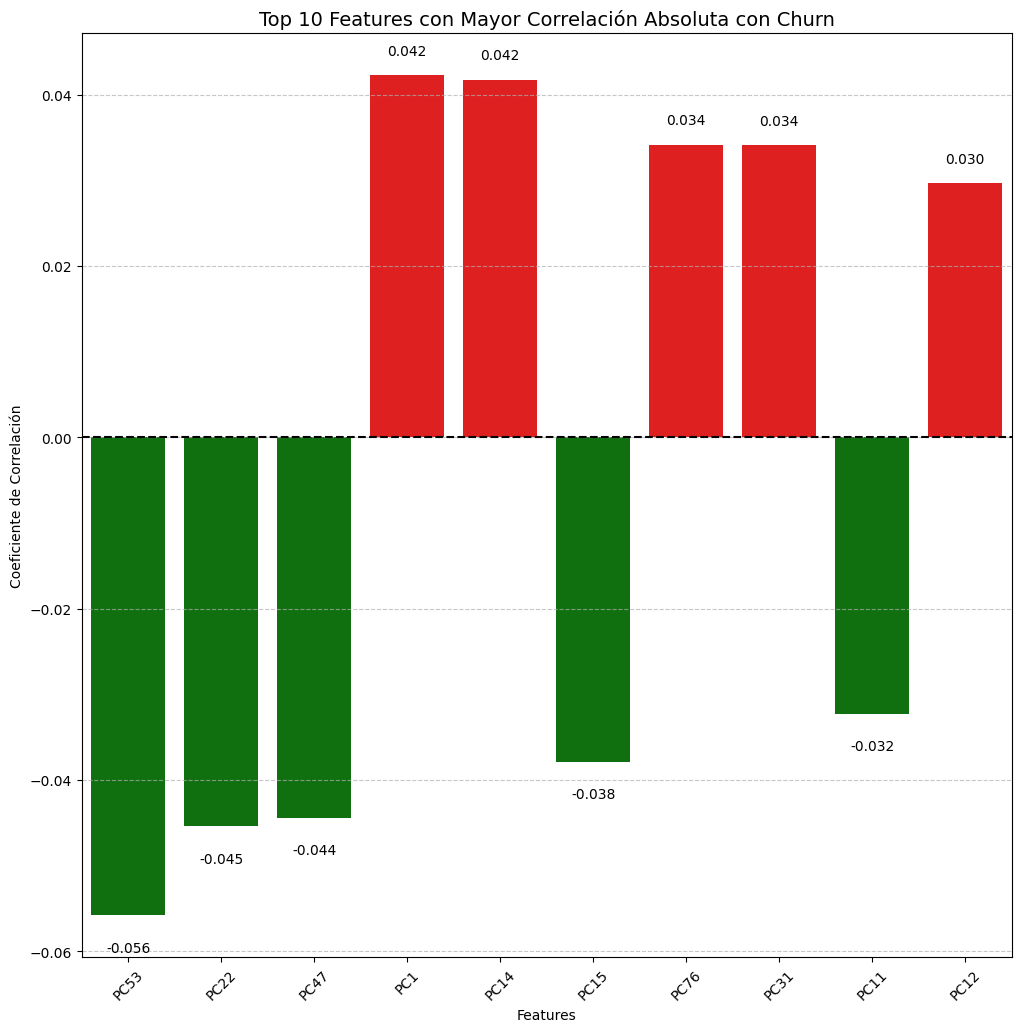

In [10]:
# Calcular correlaciones solo para variables numéricas
numeric_cols = churn.select_dtypes(include=['int64', 'float64']).columns
churn_numeric = churn[numeric_cols]

# Calcular correlaciones solo para columnas numéricas
top_corr = churn_numeric.corr()['y'].sort_values(key=abs, ascending=False).drop('y').head(10)

# Crear gráfico
plt.figure(figsize=(12, 12))
colors = ['red' if val > 0 else 'green' for val in top_corr.values]
sns.barplot(x=top_corr.index, y=top_corr.values, palette=colors)
plt.axhline(0, color='black', linestyle='--')
plt.title("Top 10 Features con Mayor Correlación Absoluta con Churn", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Coeficiente de Correlación")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valores
for i, val in enumerate(top_corr.values):
    plt.text(i, val + 0.002 if val > 0 else val - 0.003, f"{val:.3f}", 
             ha='center', va='bottom' if val > 0 else 'top', fontsize=10)

plt.show()

d:\voiceflip\env\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\voiceflip\env\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Acer\AppData\Local\Temp\ipykernel_21064\502200251.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_correlations['Feature'].head(10),



Top 10 correlaciones de variables categóricas (one-hot encoded):
       Feature  Correlation
0  FACTOR15_V9     0.172519
0  FACTOR15_V1    -0.070962
0  FACTOR15_V3    -0.070776
0         PC53    -0.055799
0  FACTOR6_V19     0.054071
0         PC22    -0.045386
0         PC47    -0.044404
0          PC1     0.042232
0         PC14     0.041739
0         PC15    -0.037835


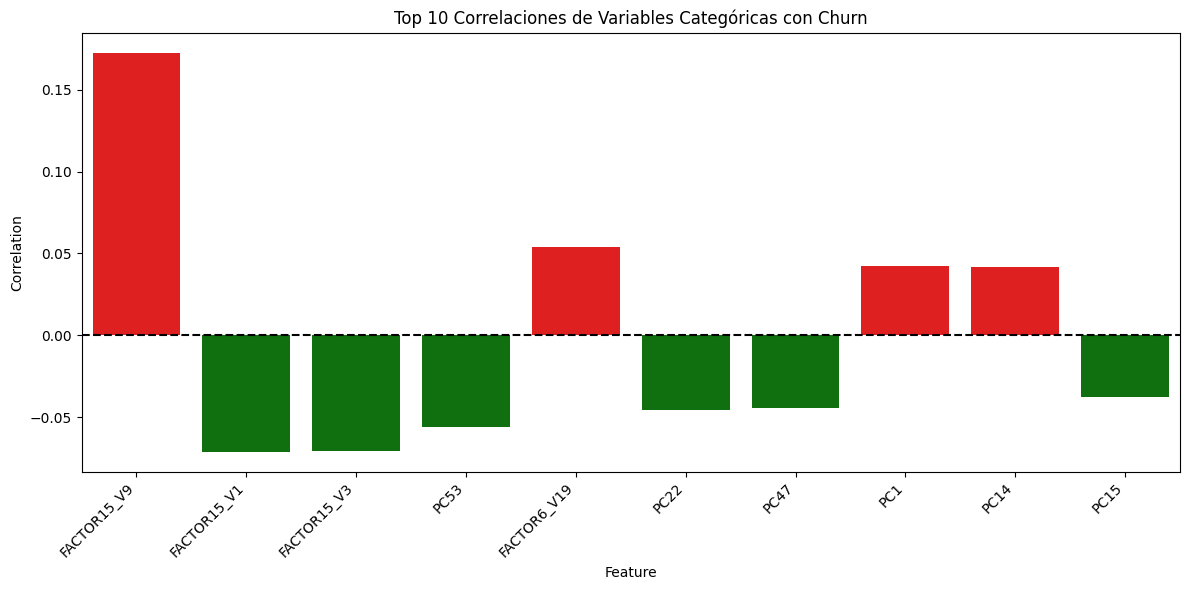

In [11]:
# Identificar columnas categóricas
categorical_cols = churn.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding
churn_encoded = pd.get_dummies(churn, columns=categorical_cols)

# Calcular correlaciones con la variable objetivo
categorical_correlations = pd.DataFrame()
for col in churn_encoded.columns:
    if col != 'y':
        correlation = churn_encoded[col].corr(churn_encoded['y'])
        categorical_correlations = pd.concat([categorical_correlations, 
                                           pd.DataFrame({'Feature': [col], 
                                                       'Correlation': [correlation]})])

# Ordenar por valor absoluto de correlación
categorical_correlations = categorical_correlations.sort_values('Correlation', 
                                                             key=abs, 
                                                             ascending=False)

# Mostrar top 10 correlaciones
print("\nTop 10 correlaciones de variables categóricas (one-hot encoded):")
print(categorical_correlations.head(10))

# Visualizar top 10 correlaciones
plt.figure(figsize=(12, 6))
colors = ['red' if val > 0 else 'green' 
          for val in categorical_correlations['Correlation'].head(10)]
sns.barplot(x=categorical_correlations['Feature'].head(10), 
           y=categorical_correlations['Correlation'].head(10),
           palette=colors)
plt.axhline(0, color='black', linestyle='--')
plt.title("Top 10 Correlaciones de Variables Categóricas con Churn")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_21064\1559606802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr.index, y=top_10_corr.values, palette=colors)


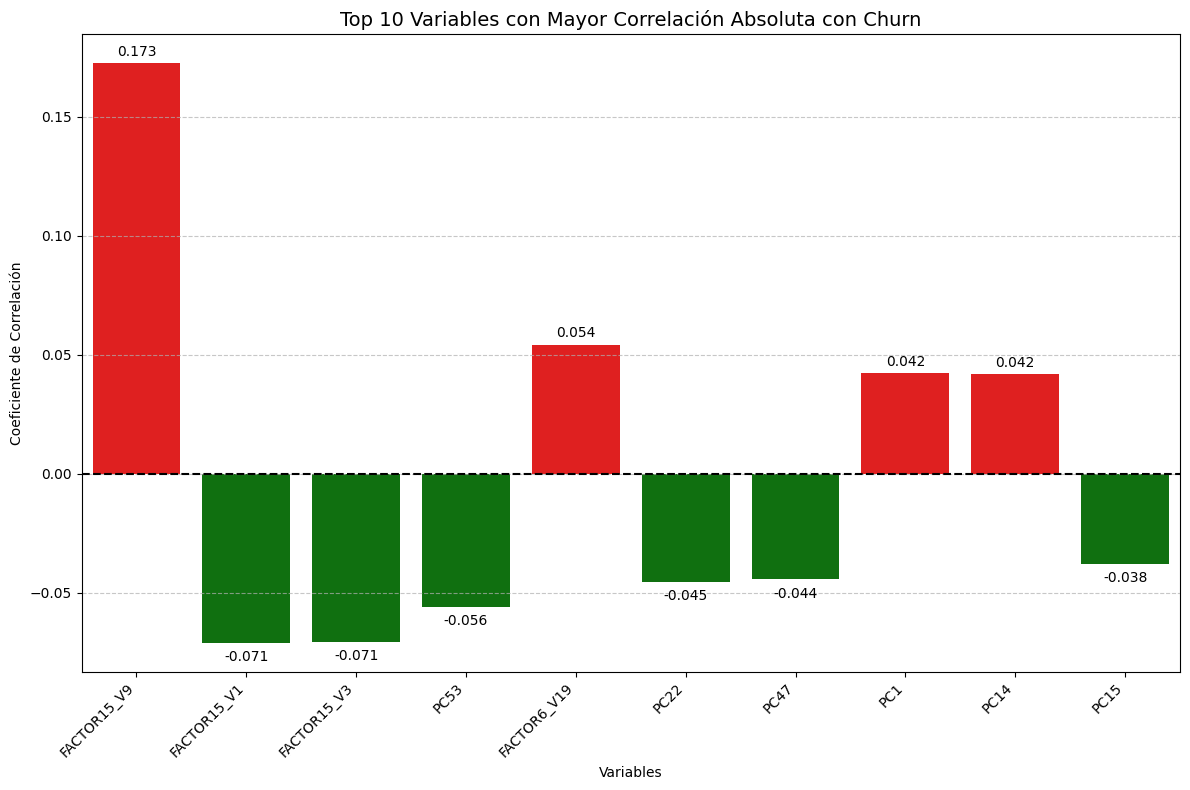

In [16]:
# Obtener las 10 variables con mayor correlación absoluta con 'y'
top_10_corr = correlations['y'].sort_values(key=abs, ascending=False)[1:11]

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
colors = ['red' if val > 0 else 'green' for val in top_10_corr.values]
sns.barplot(x=top_10_corr.index, y=top_10_corr.values, palette=colors)

# Personalizar el gráfico
plt.axhline(0, color='black', linestyle='--')
plt.title("Top 10 Variables con Mayor Correlación Absoluta con Churn", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Coeficiente de Correlación")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valores
for i, val in enumerate(top_10_corr.values):
    plt.text(i, val + 0.002 if val > 0 else val - 0.003, 
             f"{val:.3f}", 
             ha='center', 
             va='bottom' if val > 0 else 'top', 
             fontsize=10)

plt.tight_layout()
plt.show()

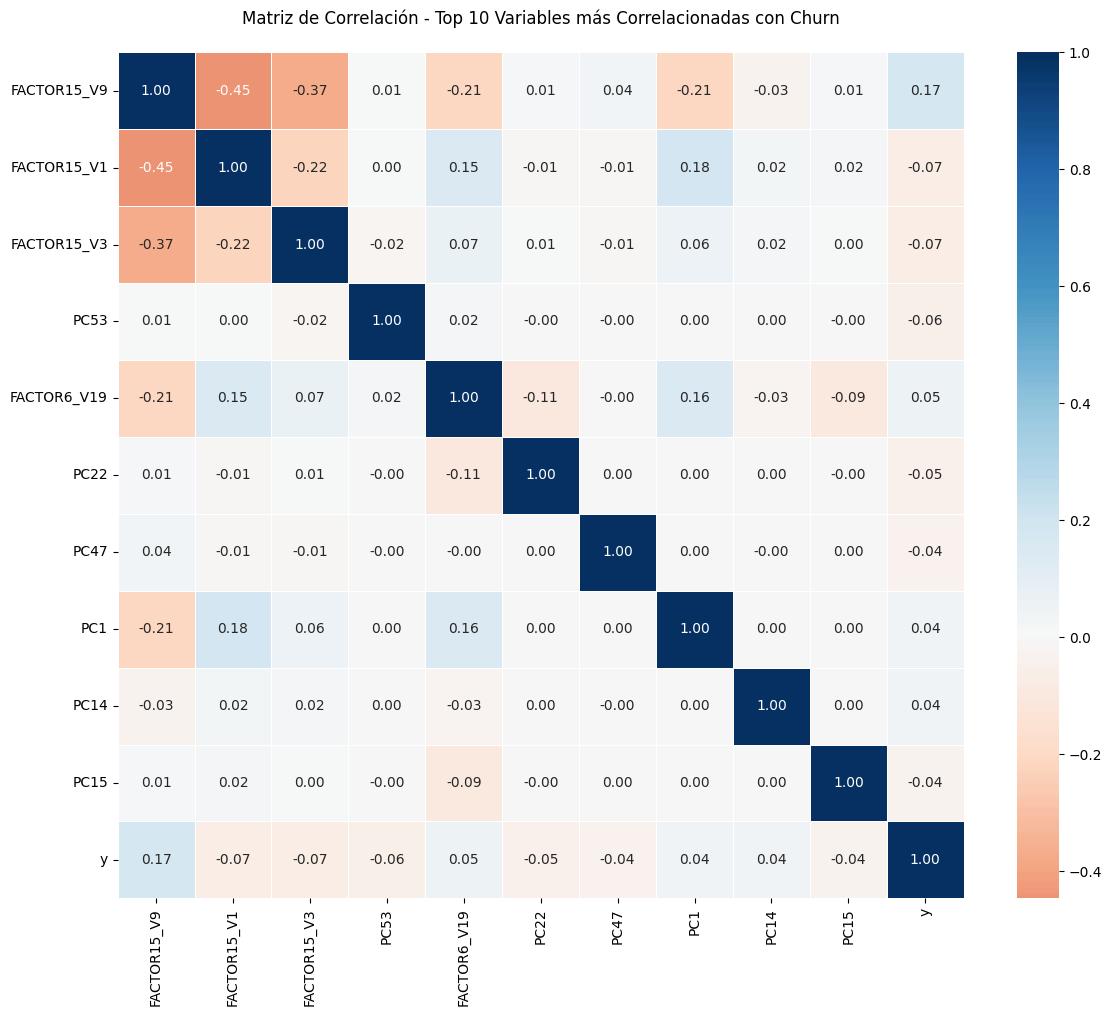

In [17]:
# Obtener las 10 variables más correlacionadas
top_10_vars = list(top_10_corr.index)
top_10_vars.append('y')  # Añadir la variable objetivo

# Crear matriz de correlación para las top 10 variables
plt.figure(figsize=(12, 10))
top_10_matrix = churn_encoded[top_10_vars].corr()

# Crear heatmap
sns.heatmap(top_10_matrix, 
            annot=True,
            cmap='RdBu',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=.5)

plt.title('Matriz de Correlación - Top 10 Variables más Correlacionadas con Churn', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Guardar el DataFrame con one-hot encoding
output_path = 'd:/voiceflip/datasets/churn_processed.csv'
churn_encoded.to_csv(output_path, index=False)